In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd
import matplotlib as mpl

sys.path.insert(0, '..')
from context.nd_array.nd_array.normalize_2d_array import normalize_2d_array
from context.fit_skew_t_pdf import fit_skew_t_pdf
from context.fit_skew_t_pdfs import fit_skew_t_pdfs
from context.fit_skew_t_pdf_globally import fit_skew_t_pdf_globally
from context.compute_context import compute_context
from context.make_context_matrix_and_summarize_context import *
from context.plot_context import plot_context
from context.plot.plot.plot_distribution import plot_distribution

In [3]:
gene_x_cell_line = pd.read_table('gene_x_cell_line.tsv', index_col=0)

gene_x_cell_line = pd.DataFrame(
    normalize_2d_array(gene_x_cell_line.values, '-0-'),
    index=gene_x_cell_line.index,
    columns=gene_x_cell_line.columns)

gene_x_cell_line

22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
KRAS          1.273035                                1.196565     0.049496   
SOX10        -0.904389                                0.902912     0.411764   
ERBB3         0.535069                                0.373426    -0.574884   
MYC           0.929646                                0.601177    -0.750205   
MAP4K4        1.081757                               -0.735906     0.414458   
GAPDH         1.777446                               -0.814863    -1.259176   
FAT1          0.116246                               -0.895063     0.276025   
PTEN         -0.575299                               -0.005482    -0.959306   
TP53         -0.344438                                1.166930    -0.460697   

        A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
KRAS                       -0.373866                     0.757640   
SOX10                      -0.929464                     0.620036   
ERBB3                       0.411764                     0.530925   
MYC                         1.260186                     1.134187   
MAP4K4                      0.274367                     1.042175   
GAPDH                       2.179069                    -0.883458   
FAT1                        0.035611                    -0.355422   
PTEN                       -0.157512                    -0.884701   
TP53                        1.192213                     0.688838   

        A204_SOFT_TISSUE  A2058_SKIN  A549_LUNG  A673_BONE  ACHN_KIDNEY  \
KRAS            1.014405    0.535691  -0.999510   1.019379     0.768209   
SOX10          -0.509605   -3.134450   0.328041   0.966326    -0.582552   
ERBB3           0.048750    0.343376  -0.067841   0.371768     0.102009   
MYC             0.477043    1.042589  -0.219890   0.417359     0.485747   
MAP4K4          0.415287    1.046941  -0.396869  -0.052796     0.141840   
GAPDH           2.228805   -1.805656   1.094398  -0.388165     2.349002   
FAT1            0.194229   -0.398112  -0.401635  -0.212222    -0.575713   
PTEN           -0.085166   -0.443911  -0.291386  -0.537789    -0.880142   
TP53            1.056474   -1.189130   0.211989  -0.737150     0.234785   

            ...       UACC812_BREAST  WM115_SKIN  WM1799_SKIN  WM2664_SKIN  \
KRAS        ...            -0.144332    0.625631    -0.169096     0.549990   
SOX10       ...             0.424405   -4.222437    -0.631874    -3.501257   
ERBB3       ...            -3.144812    1.100822     0.452589     0.469168   
MYC         ...             0.429172    1.005908    -0.960550    -0.265067   
MAP4K4      ...             0.012531   -0.102553     0.037165     0.191100   
GAPDH       ...             1.616631    1.798377    -1.306218     2.000432   
FAT1        ...            -0.561414   -0.249110     0.070779    -0.371172   
PTEN        ...            -0.826468   -0.378839     0.057930    -0.108729   
TP53        ...            -0.429198    2.690940     0.572372     3.366528   

        WM793_SKIN  WM88_SKIN  WM983B_SKIN  YD38_UPPER_AERODIGESTIVE_TRACT  \
KRAS      0.169672   0.206414    -0.222584                       -0.539447   
SOX10    -4.419310  -2.197746    -3.934379                       -0.100273   
ERBB3    -0.106884   0.858564     0.627704                       -1.035983   
MYC      -0.081581   0.892965    -0.833100                       -1.249850   
MAP4K4    1.627408   0.434767     1.090875                        1.251690   
GAPDH    -1.203015   0.567398    -0.832063                       -0.500487   
FAT1     -0.677466  -0.173137     0.725726                        0.240588   
PTEN     -0.339257  -0.754972     0.865817                        0.230226   
TP53      1.269305   1.307022    -0.414277                       -0.718706   

        YD8_UPPER_AERODIGESTIVE_TRACT  ZR751_BREAST  
KRAS                         1.156983     -0.385678  
SOX10                       -0.802843      0.667493  
ERBB3                       -0.512299     -0.346303

In [4]:
array_1d = gene_x_cell_line.loc['KRAS']

plot_context(array_1d, 'KRAS')

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


In [5]:
n, location, scale, df, shape = fit_skew_t_pdf(array_1d)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

n, location, scale, df, shape = fit_skew_t_pdf(
    array_1d, fit_fixed_location=10, fit_fixed_scale=10)
print('N={}\tLocation={:.3f}\tScale={:.3f}\tDF={:.3f}\tShape={:.3f}'.format(
    n, location, scale, df, shape))

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=501	Location=1.083	Scale=1.164	DF=4.304	Shape=-3.030
N=501	Location=10.000	Scale=10.000	DF=14163340.542	Shape=-16799704.068


In [6]:
context_dict = compute_context(array_1d)

for key, value in context_dict.items():
    print(key)
    print(value)
    if value is not None:
        print(value.shape)
    print()

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


fit
[ 501.            1.08313306    1.1642748     4.30439247   -3.03015488]
(5,)

grid
[-4.39651442 -4.39442749 -4.39234055 ...,  1.85803163  1.86011856
  1.8622055 ]
(3000,)

pdf
[ 0.00523723  0.0052461   0.00525498 ...,  0.02071609  0.02054863
  0.02038261]
(3000,)

r_pdf_reference
[  2.22044605e-16   2.22044605e-16   2.22044605e-16 ...,   2.07160946e-02
   2.05486308e-02   2.03826099e-02]
(3000,)

r_context_indices
[-2.07596611 -2.07568509 -2.07540358 ...,  0.          0.          0.        ]
(3000,)

s_pdf_reference
None

s_context_indices
None

context_indices
[-2.07596611 -2.07568509 -2.07540358 ...,  0.          0.          0.        ]
(3000,)

context_indices_like_array
[  0.00000000e+00   0.00000000e+00  -1.07248753e-02  -9.75623181e-02
   0.00000000e+00   0.00000000e+00  -0.00000000e+00  -4.04190981e-01
   0.00000000e+00   0.00000000e+00  -2.07596611e+00   0.00000000e+00
   0.00000000e+00  -1.05259486e+00  -1.98755816e-02  -0.00000000e+00
  -0.00000000e+00  -5.84626668e-04   

In [7]:
feature_x_skew_t_pdf_fit_parameter = fit_skew_t_pdfs(gene_x_cell_line)

feature_x_skew_t_pdf_fit_parameter

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


N  Location     Scale  Degree of Freedom     Shape
Feature                                                        
KRAS     501.0  1.083133  1.164275           4.304392 -3.030155
SOX10    501.0  0.550756  0.592344           2.306226 -0.929914
ERBB3    501.0  0.452074  0.606843           3.987367 -1.111803
MYC      501.0 -0.946118  1.227359          15.292884  2.261243
MAP4K4   501.0  0.482438  0.885836           7.522607 -0.764379
GAPDH    501.0 -1.666089  2.258010        1279.158480  2.326992
FAT1     501.0 -0.173529  0.362648          15.376174  0.699471
PTEN     501.0 -0.808029  1.057576      198799.571299  3.093096
TP53     501.0 -1.357790  1.506077           6.161618  5.347668

In [8]:
context__feature_x_sample, feature_context_summary = make_context_matrix_and_summarize_context(
    gene_x_cell_line)

(1/9) KRAS ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


(2/9) SOX10 ...
(3/9) ERBB3 ...
(4/9) MYC ...
(5/9) MAP4K4 ...
(6/9) GAPDH ...
(7/9) FAT1 ...
(8/9) PTEN ...
(9/9) TP53 ...


In [9]:
context__feature_x_sample

22RV1_PROSTATE  697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE  786O_KIDNEY  \
Feature                                                                        
KRAS           0.000000                                0.000000    -0.010725   
SOX10         -0.118436                                0.000000     0.000000   
ERBB3          0.000000                                0.000000    -0.047433   
MYC            0.125903                                0.049063    -0.000000   
MAP4K4         0.000000                               -0.006591     0.000000   
GAPDH          0.064714                               -0.000000    -0.000000   
FAT1           0.000000                               -0.000000     0.001616   
PTEN          -0.000000                                0.000827    -0.000000   
TP53           0.007303                                0.906334     0.001755   

         A1207_CENTRAL_NERVOUS_SYSTEM  A172_CENTRAL_NERVOUS_SYSTEM  \
Feature                                                              
KRAS                        -0.097562                     0.000000   
SOX10                       -0.124930                     0.000000   
ERBB3                        0.000000                     0.000000   
MYC                          0.232187                     0.188971   
MAP4K4                       0.000000                     0.000000   
GAPDH                        0.099387                    -0.000000   
FAT1                         0.000000                    -0.000000   
PTEN                         0.000063                    -0.000000   
TP53                         0.934026                     0.443454   

         A204_SOFT_TISSUE  A2058_SKIN     A549_LUNG  A673_BONE  ACHN_KIDNEY  \
Feature                                                                       
KRAS             0.000000   -0.000000 -4.041910e-01   0.000000     0.000000   
SOX10           -0.032783   -0.777081  0.000000e+00   0.000000    -0.045265   
ERBB3           -0.000000    0.000000 -0.000000e+00   0.000000    -0.000000   
MYC              0.029799    0.159401  0.000000e+00   0.022532     0.030896   
MAP4K4           0.000000    0.000000 -0.000000e+00  -0.000000     0.000000   
GAPDH            0.103961   -0.000000  2.172663e-02   0.000000     0.115294   
FAT1             0.000000   -0.000000 -0.000000e+00  -0.000000    -0.000000   
PTEN             0.000267   -0.000000  1.227895e-07  -0.000000    -0.000000   
TP53             0.789184   -0.000000  1.394189e-01   0.000000     0.149685   

             ...       UACC812_BREAST  WM115_SKIN  WM1799_SKIN  WM2664_SKIN  \
Feature      ...                                                              
KRAS         ...            -0.037856    0.000000    -0.042873    -0.000000   
SOX10        ...             0.000000   -0.998832    -0.054558    -0.868349   
ERBB3        ...            -0.749809    0.000000     0.000000     0.000000   
MYC          ...             0.023938    0.148092    -0.000000     0.000000   
MAP4K4       ...            -0.000000   -0.000000    -0.000000     0.000000   
GAPDH        ...             0.052517    0.066440    -0.000000     0.083565   
FAT1         ...            -0.000000   -0.000000     0.000000    -0.000000   
PTEN         ...            -0.000000   -0.000000     0.001669     0.000176   
TP53         ...             0.002795    2.388248     0.352676     2.652763   

         WM793_SKIN  WM88_SKIN  WM983B_SKIN  YD38_UPPER_AERODIGESTIVE_TRACT  \
Feature                                                                       
KRAS      -0.002693  -0.001366    -0.054983                       -0.160316   
SOX10     -1.024355  -0.513547    -0.954782                       -0.000010   
ERBB3     -0.000000   0.000000     0.000000                       -0.186161   
MYC        0.000000   0.115665    -0.000000                       -0.000000   
MAP4K4     0.000000   0.000000     0.000000                        0.000000   
GAPDH     -0.000000   0.005409    -0.000000                     

In [10]:
feature_context_summary

Feature
KRAS     -221.715893
SOX10     -99.120126
ERBB3     -32.254626
MYC        52.076780
MAP4K4    -17.822332
GAPDH      31.789264
FAT1        3.371835
PTEN       14.022589
TP53      404.444040
Name: Context Summary, dtype: float64

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


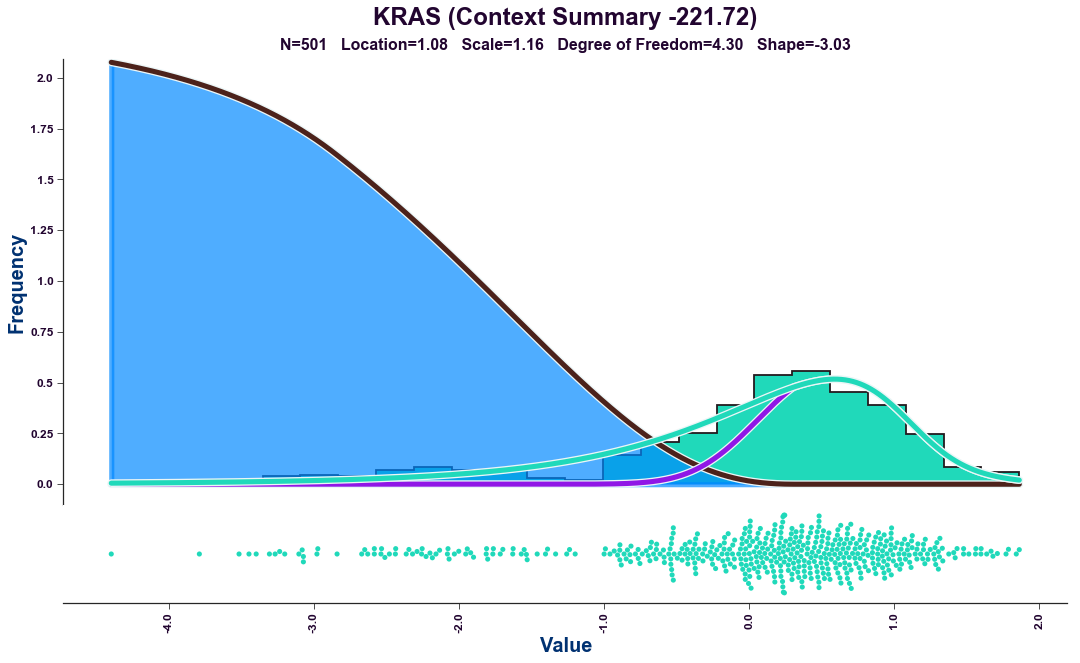

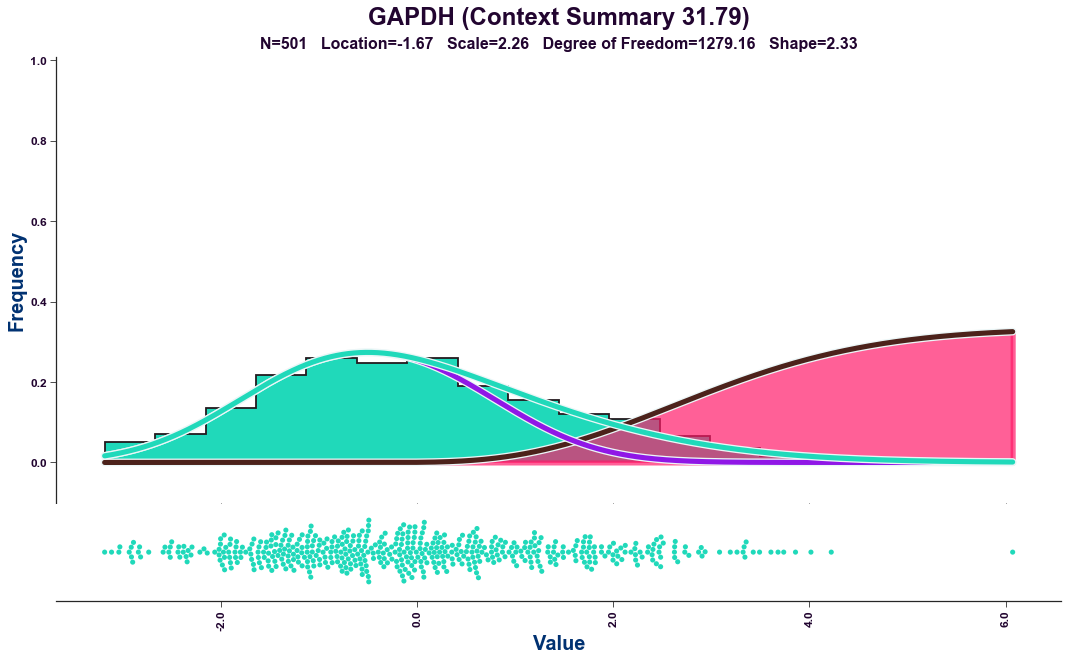

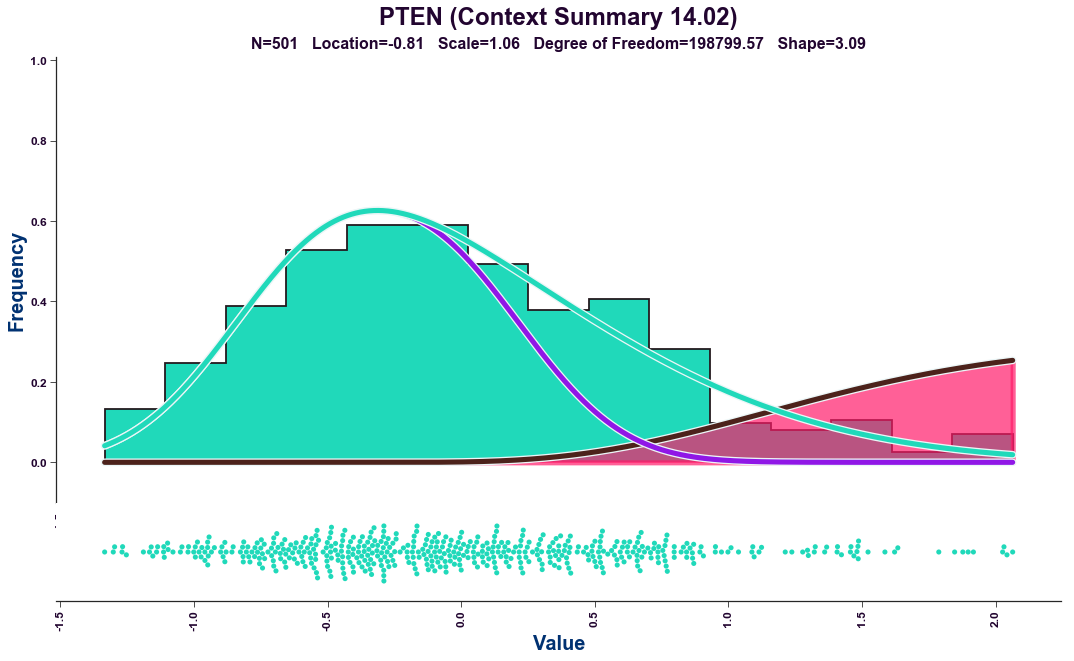

In [11]:
for feature, feature_vector in gene_x_cell_line.iterrows():
    plot_context(feature_vector, feature, add_context_summary_to_title=True)

    mpl.pyplot.show()

In [12]:
compound_x_cell_line = pd.read_table('compound_x_cell_line.tsv', index_col=0)

compound_x_cell_line = pd.DataFrame(
    normalize_2d_array(compound_x_cell_line.values, '-0-'),
    index=compound_x_cell_line.index,
    columns=compound_x_cell_line.columns)

compound_x_cell_line

22RV1_PROSTATE  2313287_STOMACH  \
16-beta-bromoandrosterone        0.634172        -0.169596   
1S,3R-RSL-3                     -1.596762        -1.202165   
3-Cl-AHPC                       -1.190302        -1.122932   
968                              0.554092         0.865091   
A-804598                              NaN              NaN   
AA-COCF3                        -0.434412        -1.557527   
ABT-199                               NaN              NaN   
ABT-737                         -0.043756         0.658747   
AC55649                          0.329104         0.301140   
AGK-2                            0.931189         1.562933   
AM-580                           0.654933         0.167673   
AT-406                                NaN              NaN   
AT13387                               NaN              NaN   
AT7867                           1.016354        -0.058586   
AZ-3146                          0.287158         0.533754   
AZD1480                               NaN              NaN   
AZD4547                          0.158351         0.100304   
AZD6482                         -0.110701        -0.488646   
AZD7545                          0.528246         0.442657   
AZD7762                         -0.867862        -1.764973   
AZD8055                         -2.469255        -2.142621   
B02                              0.911275        -0.089516   
BCL-LZH-4                             NaN              NaN   
BEC                              0.637138         0.658323   
BI-2536                         -2.465442        -3.451106   
BIBR-1532                       -0.193324         0.218517   
BIRB-796                         0.221907        -0.133158   
BIX-01294                       -0.161122         0.201145   
BMS-195614                       0.215551         0.897716   
BMS-270394                       1.149821         1.118043   
...                                   ...              ...   
tacedinaline                          NaN              NaN   
tacrolimus                       0.680356         0.289700   
tamatinib                        0.542228         0.569769   
tamoxifen                        0.215128         0.331647   
tandutinib                       0.515534         0.499010   
tanespimycin                    -0.919554        -1.299617   
temozolomide                     1.122704         0.818484   
temsirolimus                    -2.233378        -1.738576   
teniposide                      -1.631590        -2.158976   
thalidomide                           NaN              NaN   
tigecycline                      1.154905         1.027794   
tipifarnib-P1                    0.121065         0.709168   
tipifarnib-P2                   -1.244112         0.476977   
tivantinib                            NaN              NaN   
tivozanib                        0.475283         0.302835   
topotecan                       -2.740257        -2.202067   
tosedostat                      -0.974636        -0.467885   
trametinib                            NaN              NaN   
tretinoin                        0.247329        -0.413227   
triazolothiadiazine             -1.168693        -2.108682   
trifluoperazine                  0.274023         0.208348   
triptolide                      -0.305606        -0.327215   
tubastatin A                     0.235042         0.763826   
valdecoxib                      -0.261540        -0.608978   
vandetanib                      -0.093753        -0.174257   
veliparib                        0.186739         0.654933   
vincristine                     -3.443607        -3.485808   
vorapaxar                        0.106659         0.580361   
vorinostat                      -1.122932        -0.606012   
zebularine                       0.017681        -0.016639   

                           253J_URINARY_TRACT  253JBV_URINARY_TRACT  \
16-beta-bromoandrosterone            0.750267              0.643070   
1S,3R-RSL-3                         -2.3

Dropping 56812 missing values (of total 310245) ...


/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


N=253433   Location=0.93   Scale=0.93   Degree of Freedom=3.13   Shape=-3.05


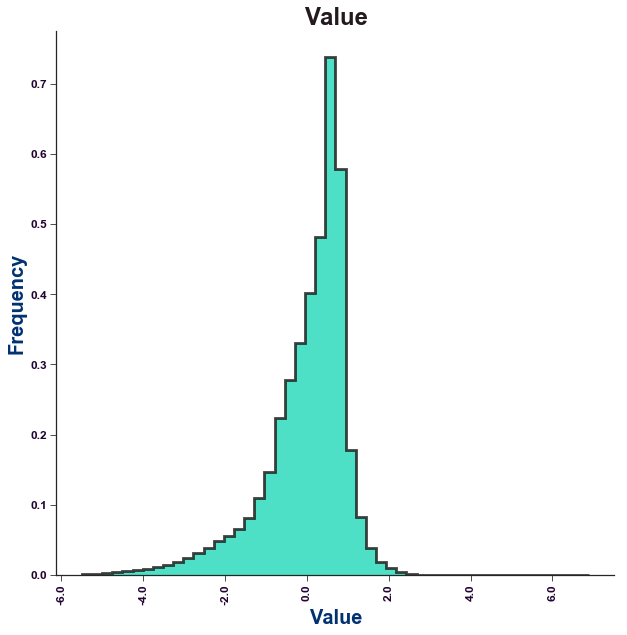

In [13]:
global_n, global_location, global_scale, global_degree_of_freedom, global_shape = fit_skew_t_pdf_globally(
    compound_x_cell_line)

/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/Users/k/Jumis/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in sqrt
  Shat = sqrt(mu2hat / mu2)


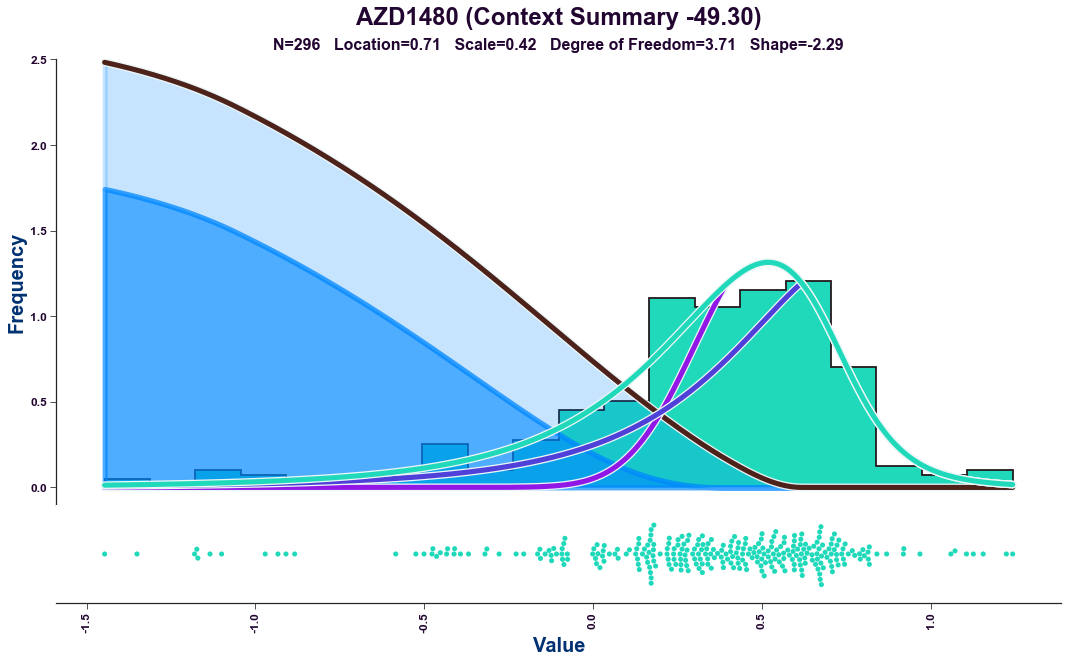

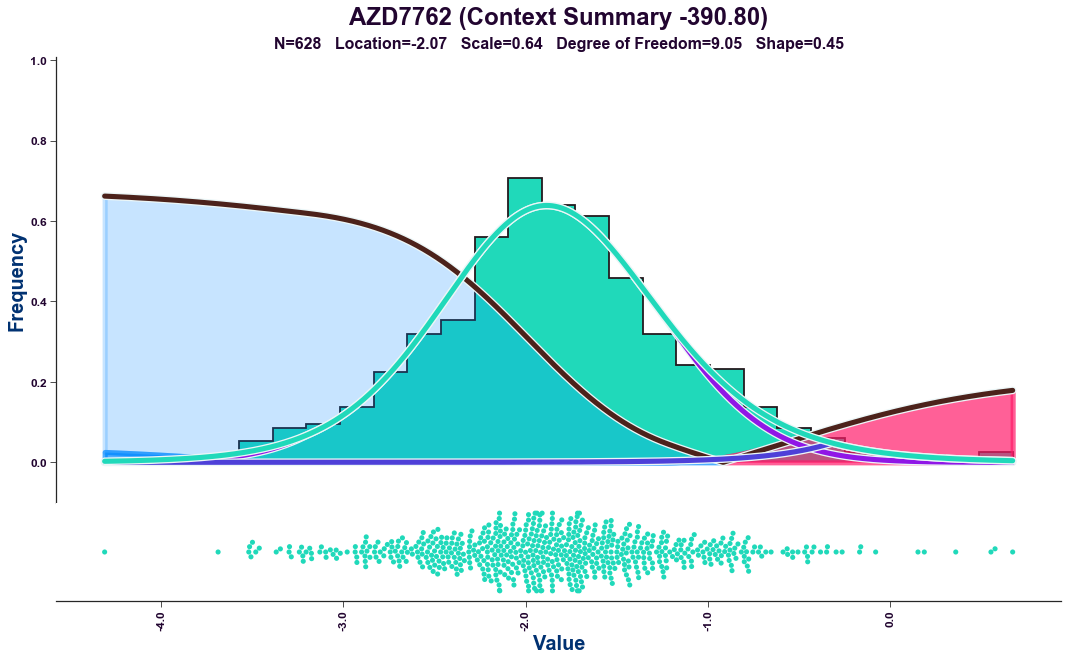

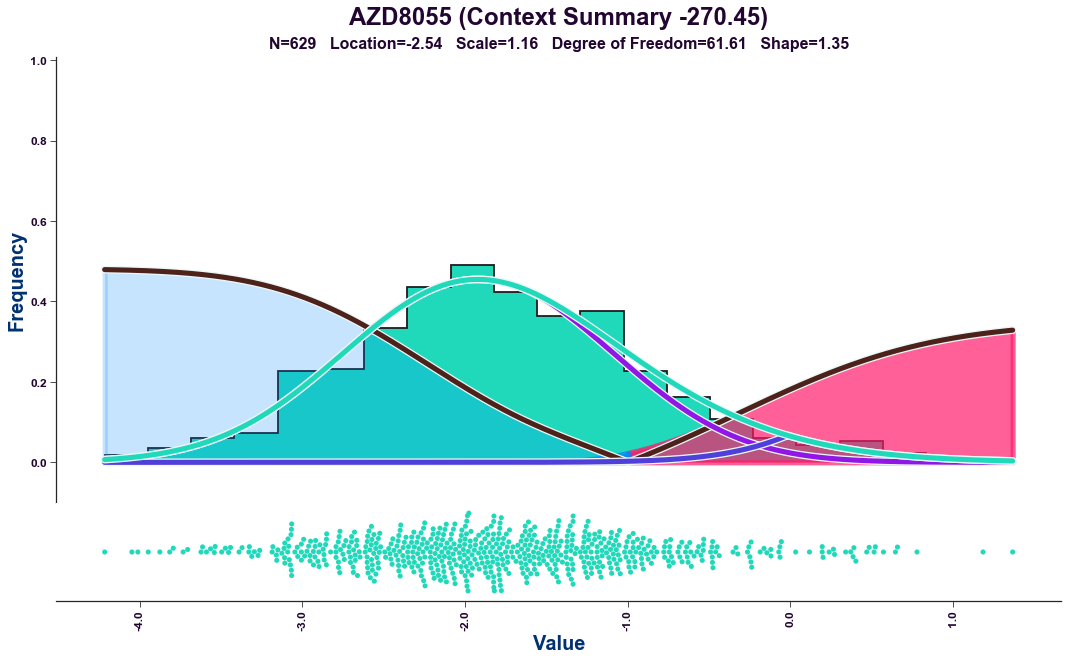

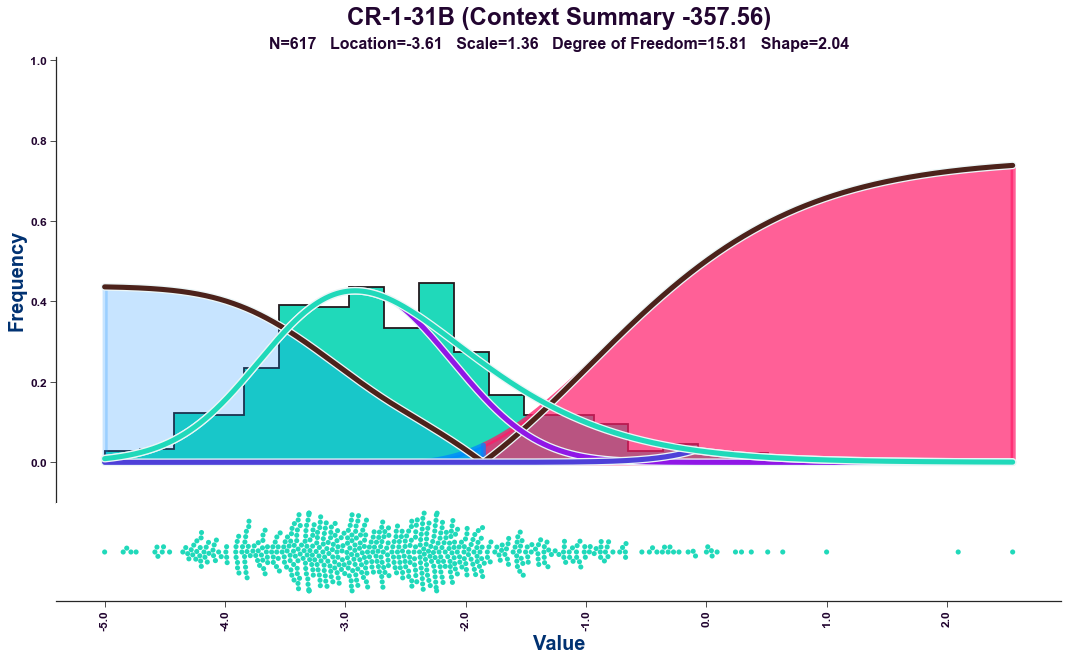

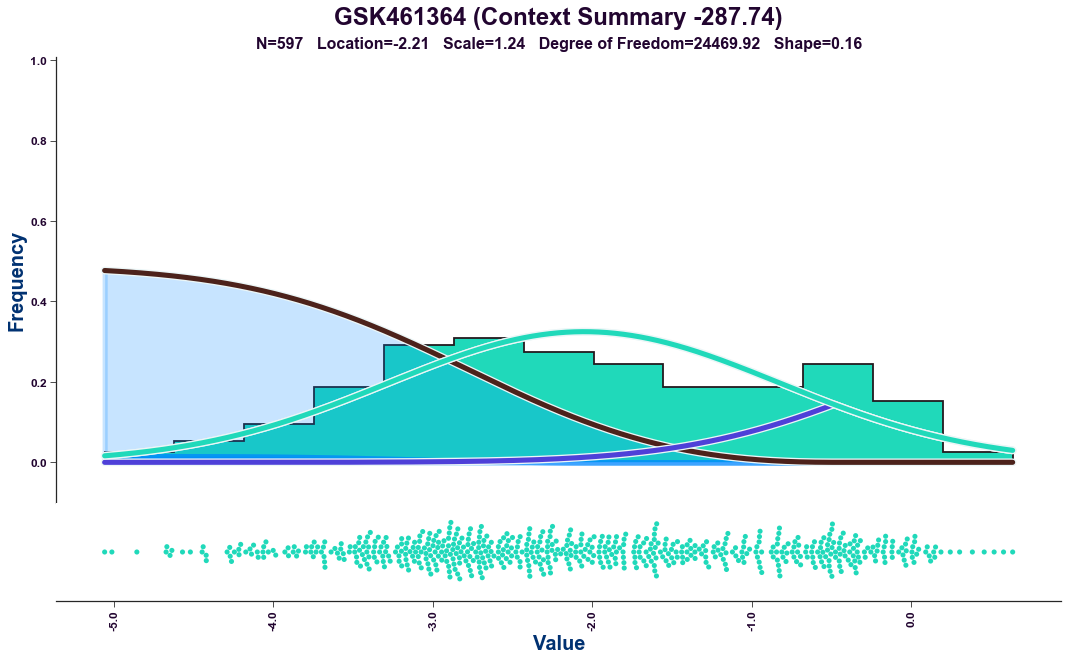

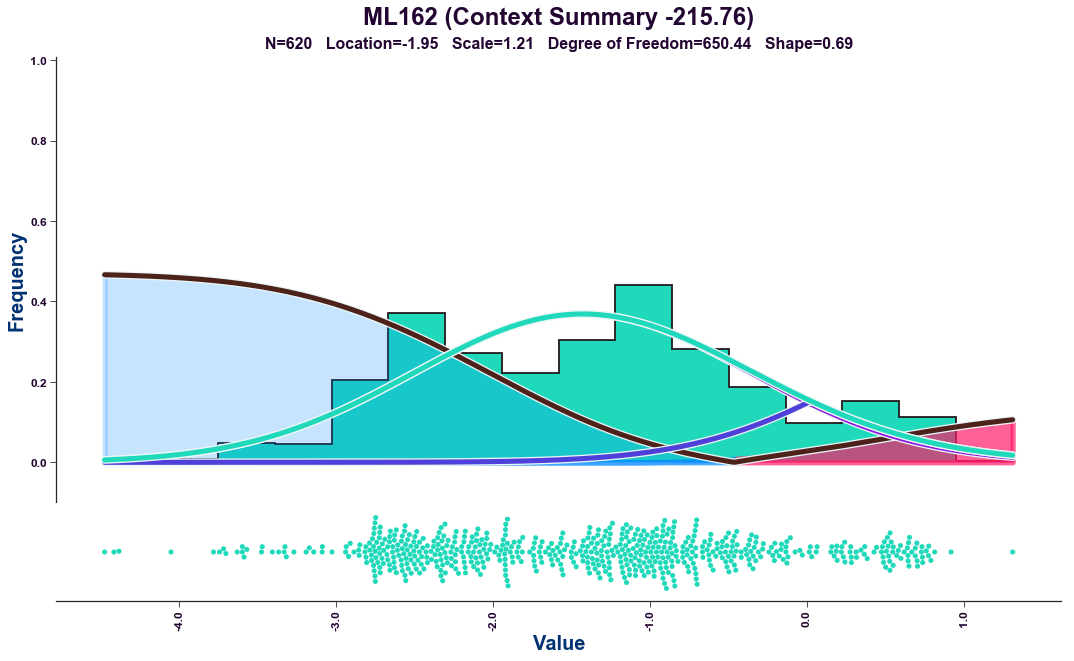

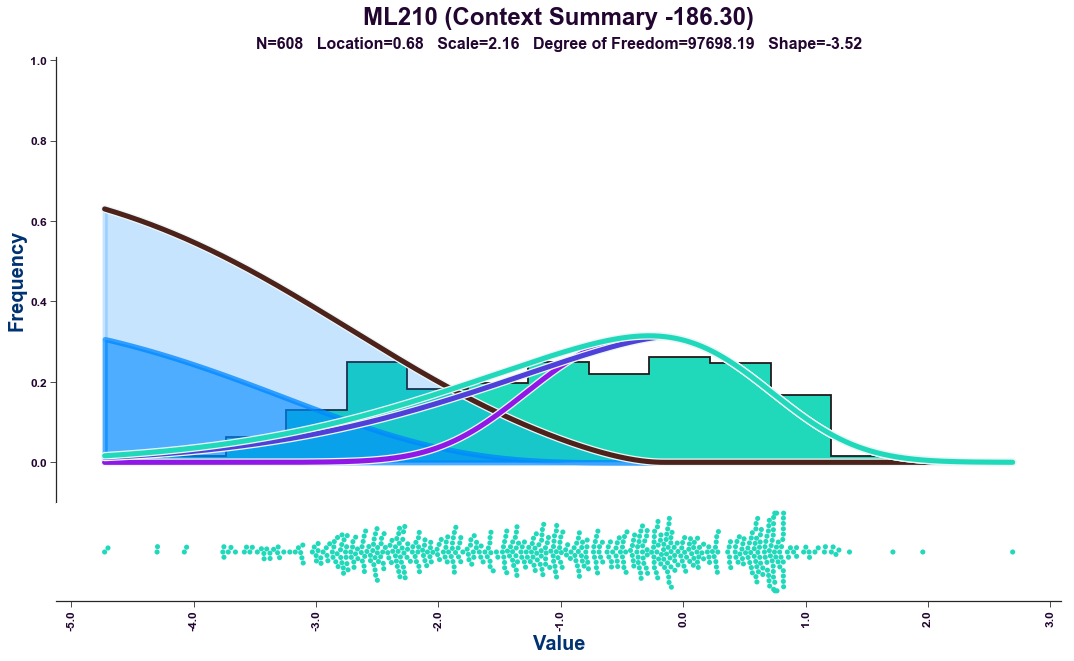

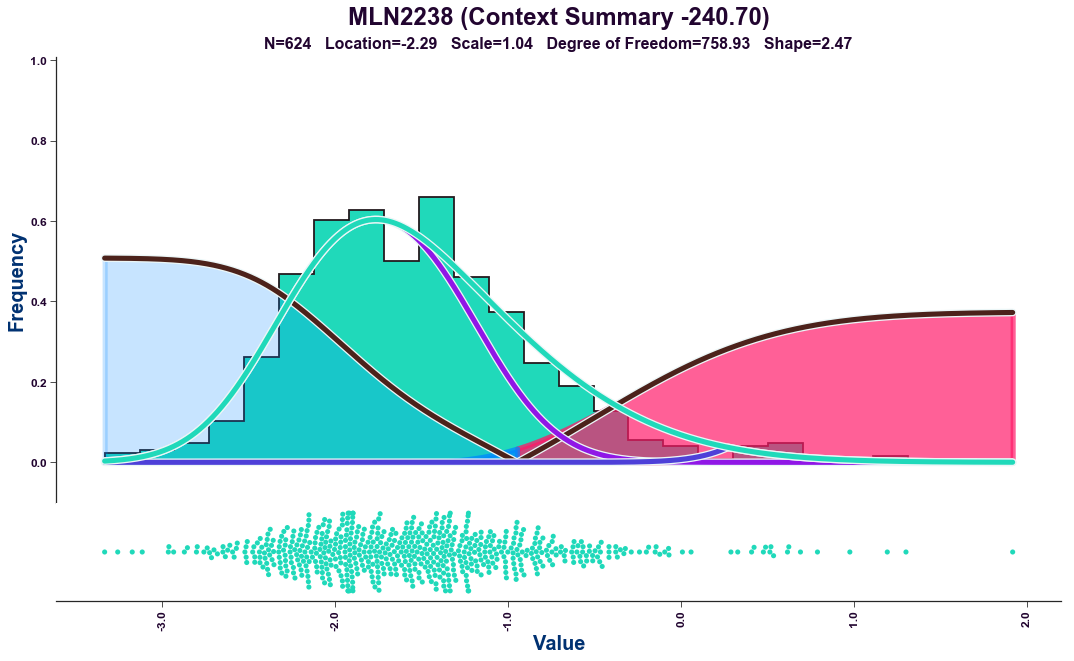

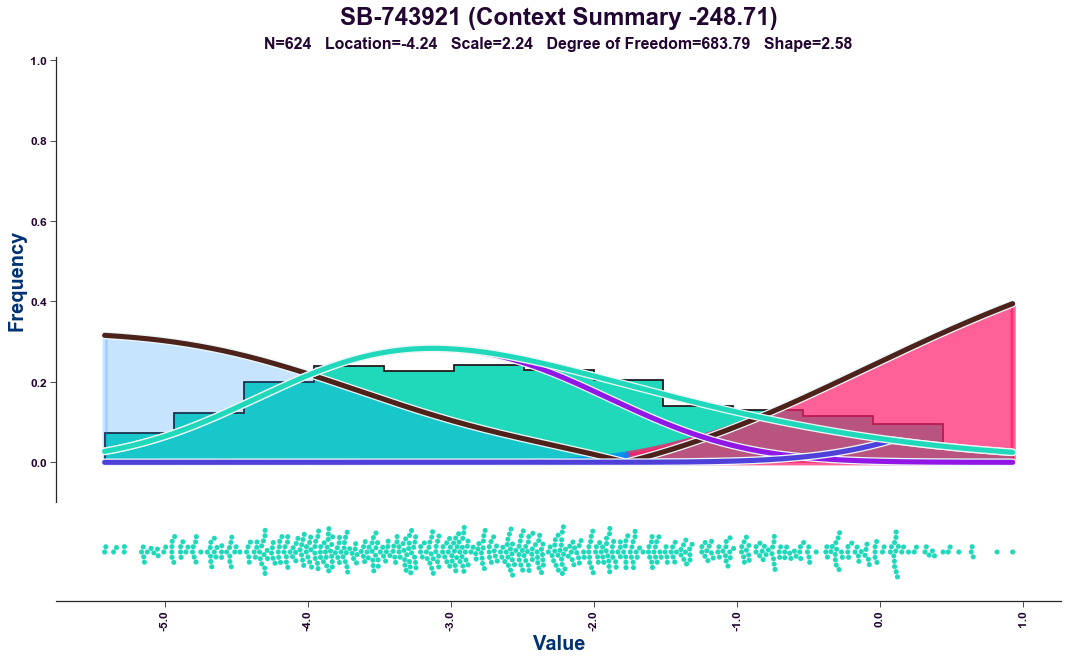

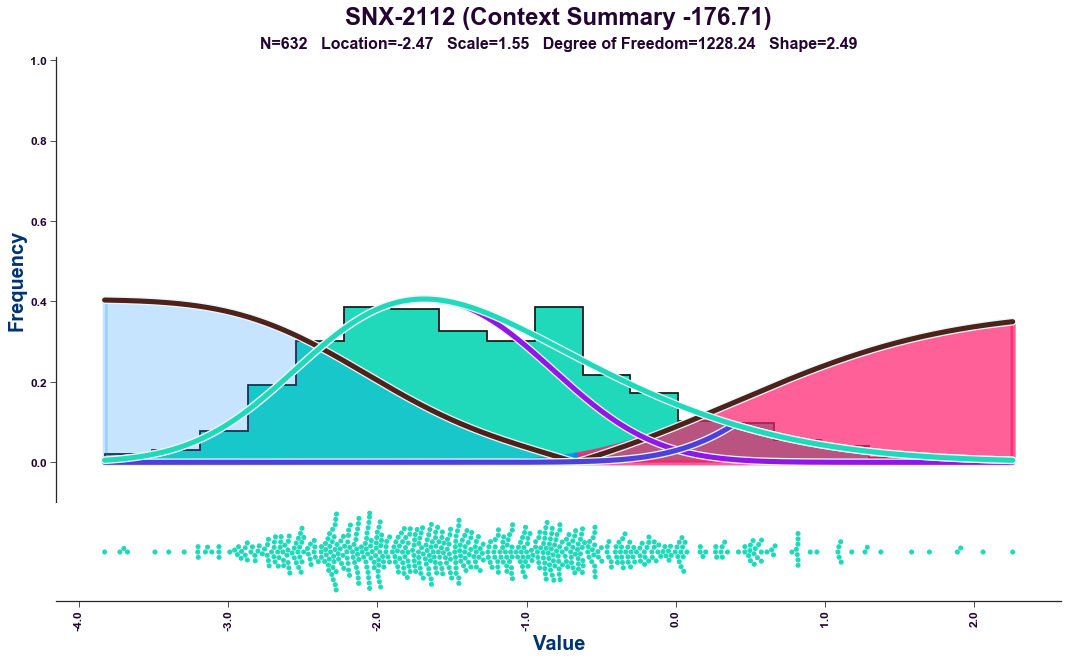

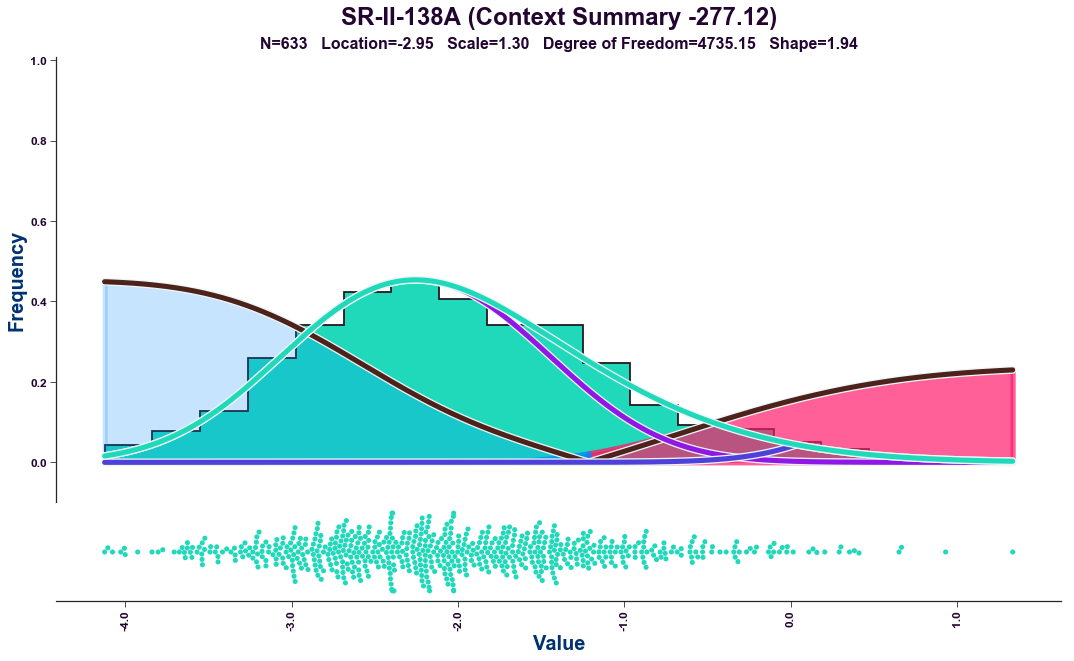

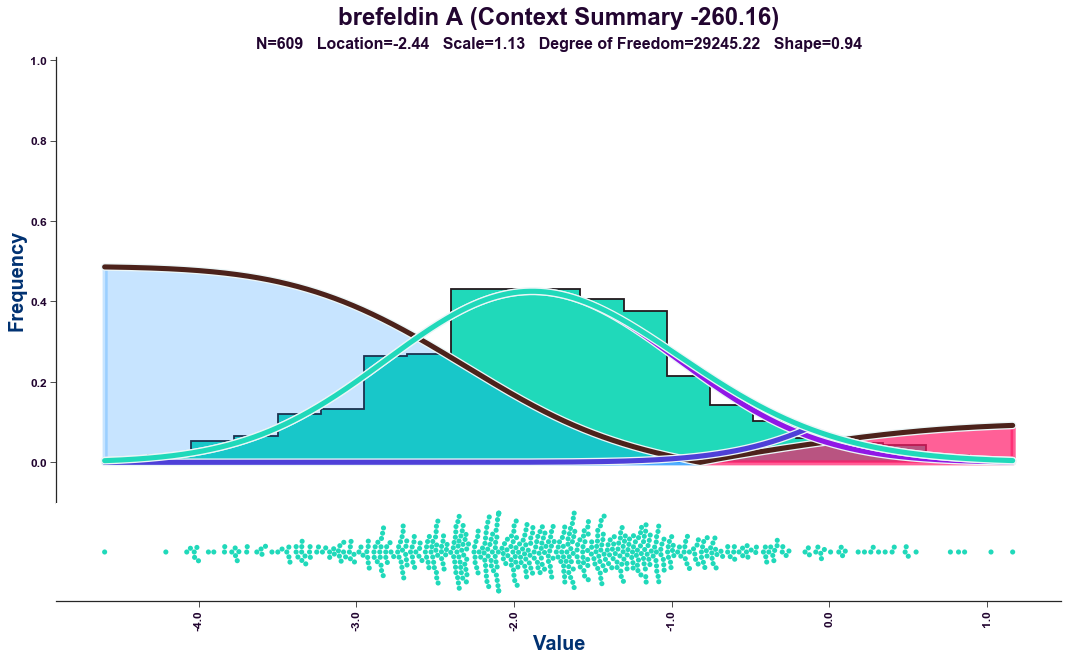

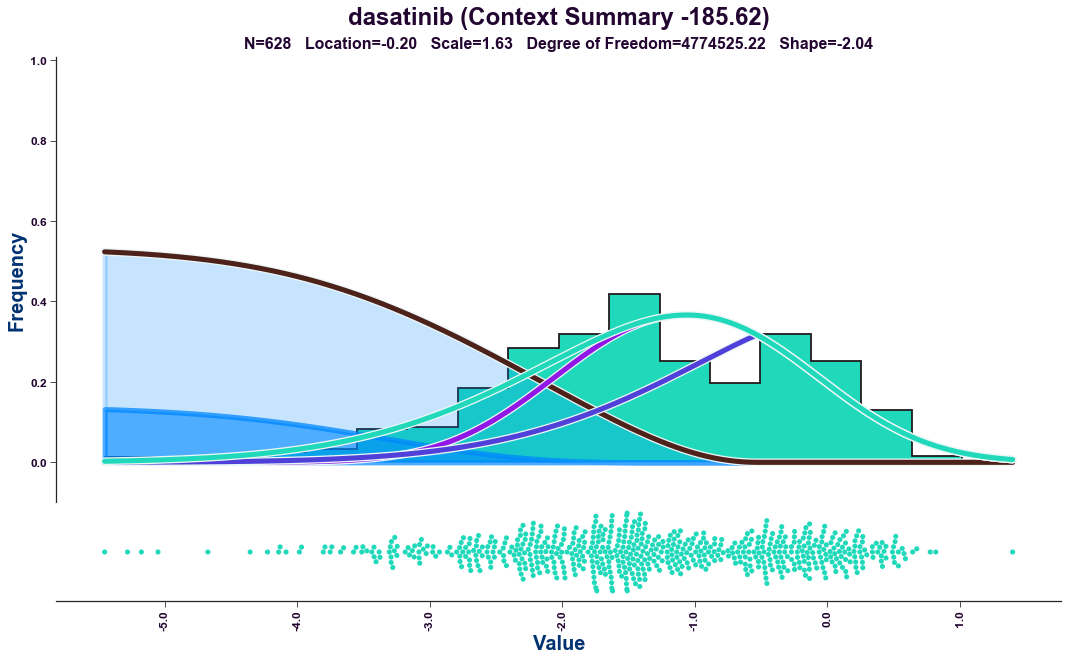

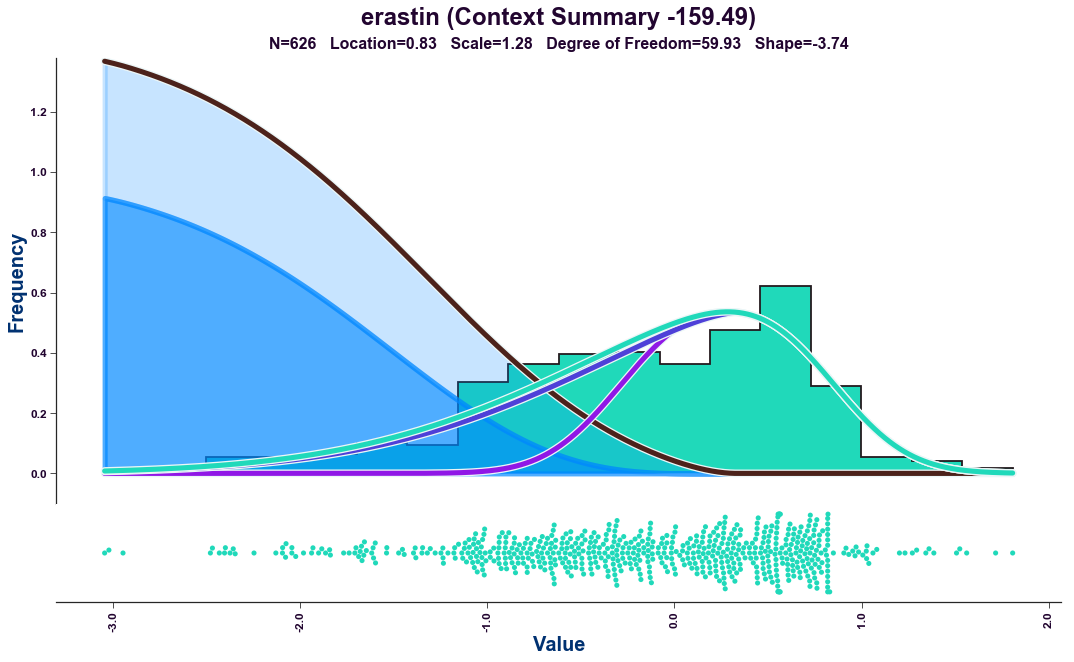

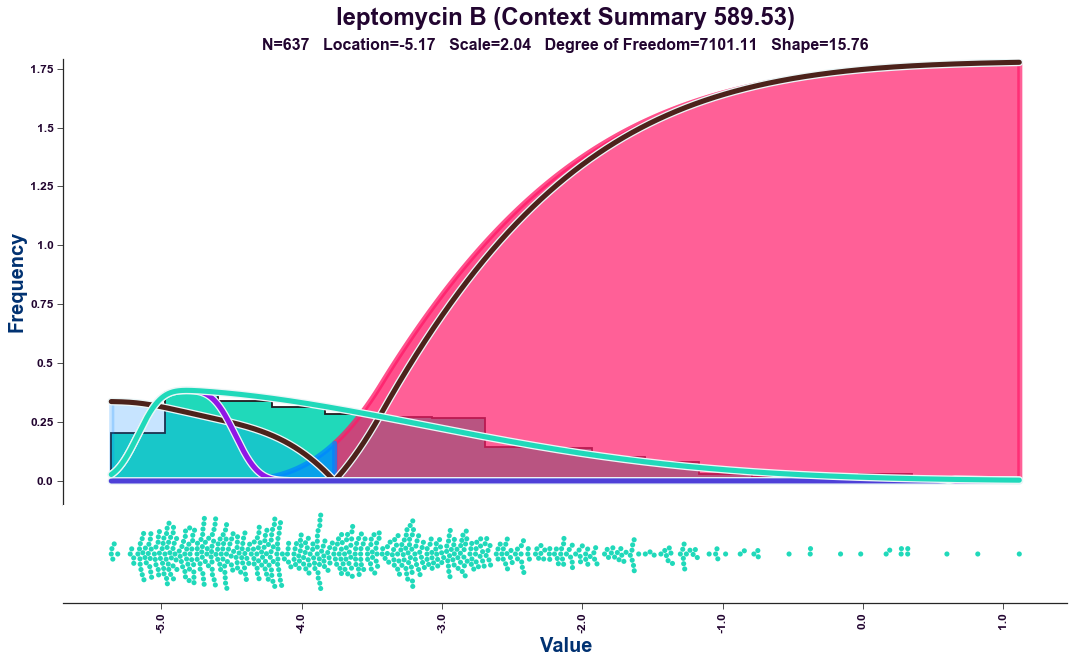

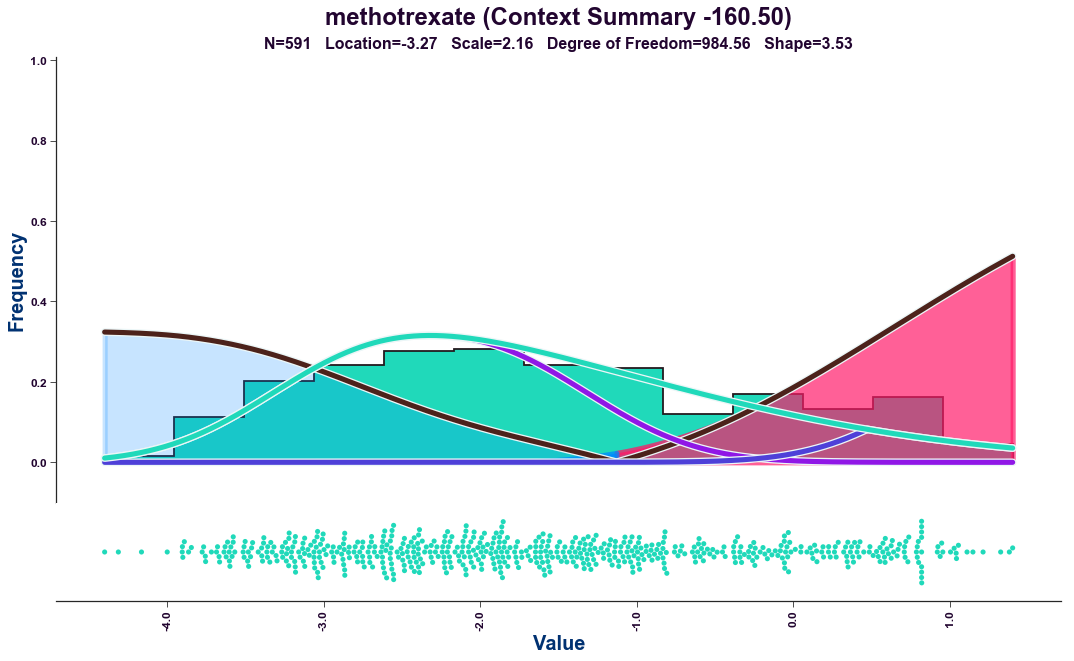

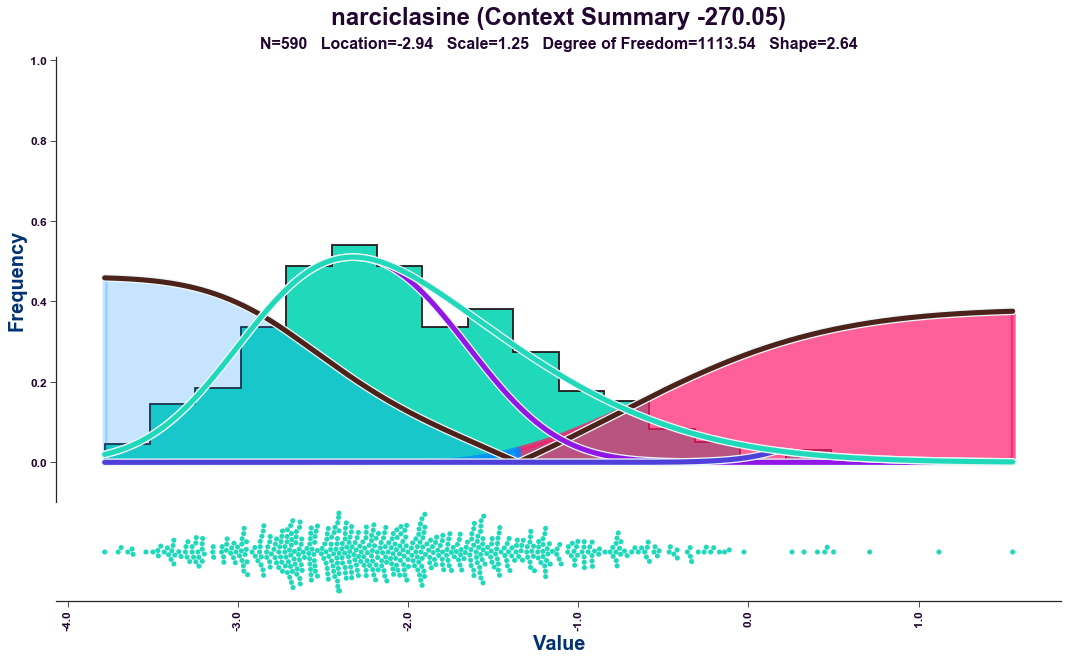

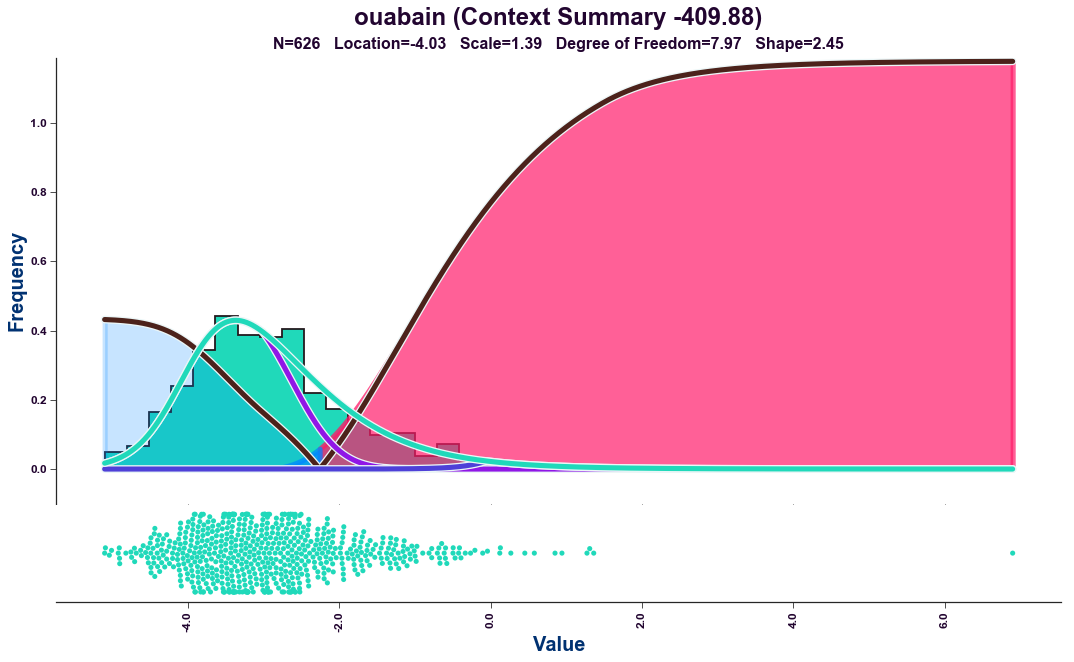

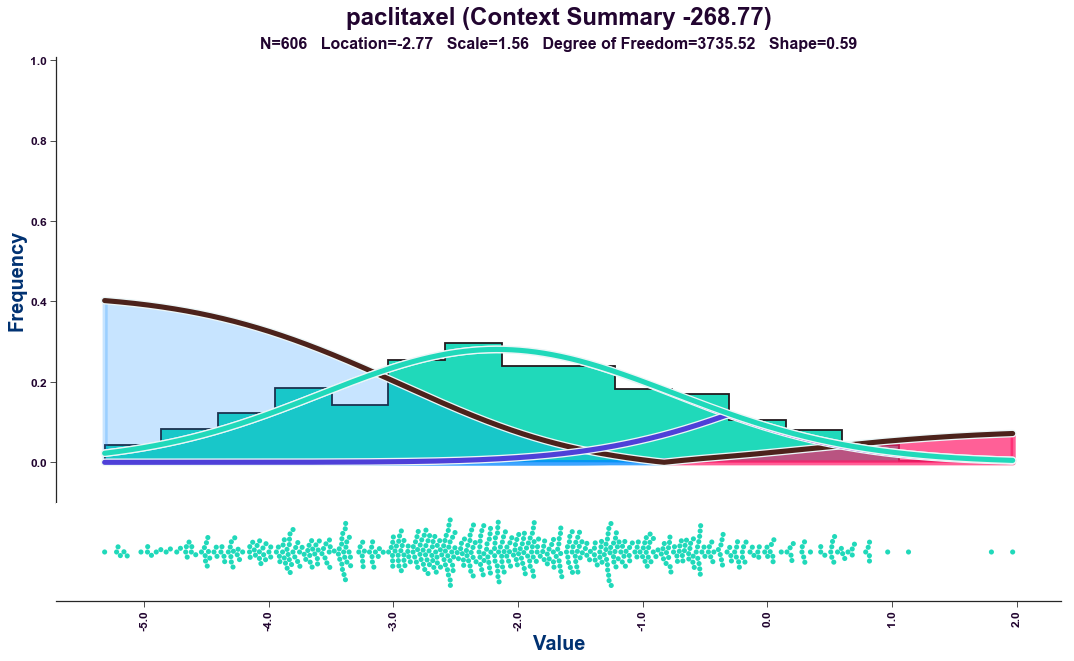

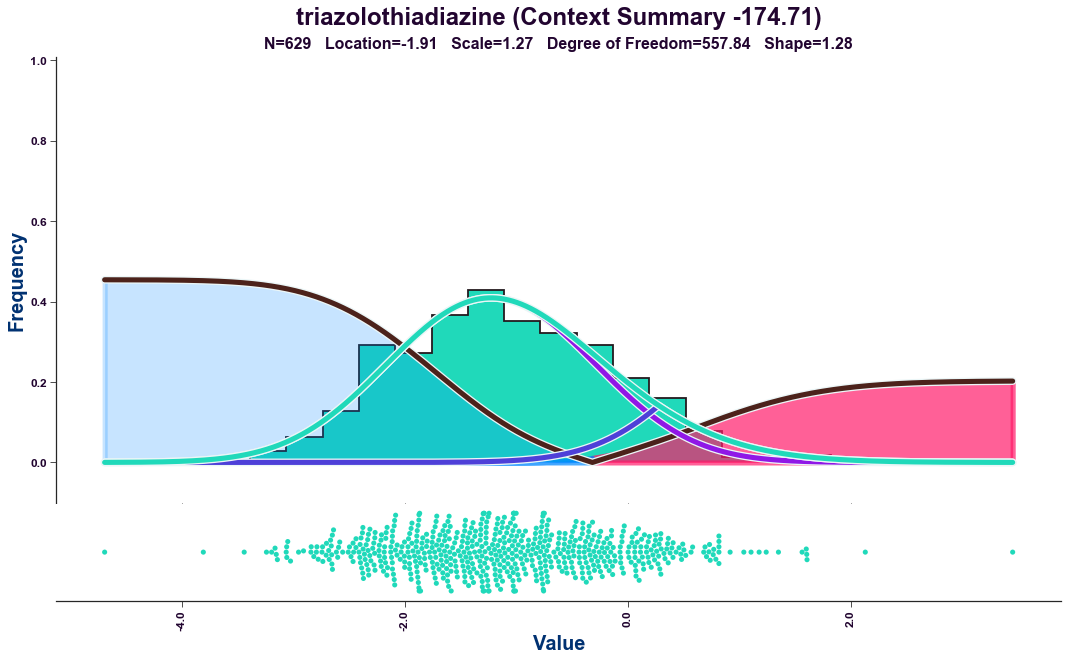

In [14]:
for feature, feature_vector in compound_x_cell_line.iterrows():

    if feature not in (
            '1S,3R-RSL-3',
            'AZD1480',
            'AZD7762',
            'AZD8055',
            'BI-2536',
            'CAY10618',
            'CR-1-31B',
            'GSK461364',
            'LBH-589',
            'ML162',
            'ML210',
            'MLN2238',
            'RITA',
            'SB-743921',
            'SNX-2112',
            'SR-II-138A',
            'brefeldin A',
            'dasatinib',
            'erastin',
            'leptomycin B',
            'methotrexate',
            'narciclasine',
            'ouabain',
            'paclitaxel',
            'triazolothiadiazine', ):
        continue

    plot_context(
        feature_vector.dropna(),
        feature,
        global_location=global_location,
        global_scale=global_scale)

    mpl.pyplot.show()